In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Step 2: Load the Dataset
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df = df[[0, 5]]
df.columns = ['label', 'tweet']

# Map labels (0 = negative, 2 = neutral, 4 = positive)
df['label'] = df['label'].map({0: 0, 2: 1, 4: 2})
df = df.sample(n=30000, random_state=42)  # To reduce size for easier processing

df.head()

,label,tweet
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,@TiannaChaos i know just family drama. its la...
285055,0,School email won't open and I have geography ...
705995,0,upper airways problem


In [ ]:
# Step 3: Text Preprocessing Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove links
    text = re.sub(r'\@w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove non-alphabet
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_tweet'] = df['tweet'].apply(clean_text)
df[['tweet', 'cleaned_tweet']].head()

,tweet,cleaned_tweet
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,chrishasboobs ahhh hope ok
750,"@misstoriblack cool , i have no tweet apps fo...",misstoriblack cool tweet apps razr
766711,@TiannaChaos i know just family drama. its la...,tiannachaos know family drama lamehey next tim...
285055,School email won't open and I have geography ...,school email wont open geography stuff revise ...
705995,upper airways problem,upper airways problem


In [ ]:
# Step 4: Convert Text into Numerical Vectors
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_tweet']).toarray()
y = df['label']

In [ ]:
# Step 5: Split the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train a Machine Learning Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'], labels=np.unique(y_test)))

Accuracy: 0.7475

Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.72      0.74      3044
     Neutral       0.73      0.78      0.75      2956

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(


In [ ]:
# Step 8: Test with a Custom Tweet
def predict_sentiment(tweet):
    cleaned = clean_text(tweet)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)[0]
    sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    return sentiment_map[prediction]

# Example:
print(predict_sentiment("I love the new update on Instagram!"))
print(predict_sentiment("This app is crashing every time I open it."))

Positive
Negative


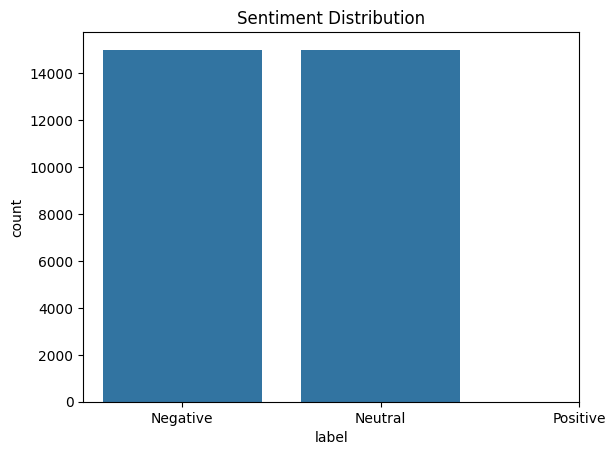

In [ ]:
sns.countplot(x='label', data=df)
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
print("Distribution of labels in the original dataset:")
print(df['label'].value_counts())

print("\nDistribution of labels in the training set:")
print(y_train.value_counts())

print("\nDistribution of labels in the test set:")
print(y_test.value_counts())

Distribution of labels in the original dataset:
label
2    15001
0    14999
Name: count, dtype: int64

Distribution of labels in the training set:
label
2    12045
0    11955
Name: count, dtype: int64

Distribution of labels in the test set:
label
0    3044
2    2956
Name: count, dtype: int64
